<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-/blob/master/Identication_of_Series_In_the_terms_of_Stationary_and_non_Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If any series having the trend,sesonality that we can say it is non-stationary series.one onother way to identify wheather it is stationary or not by taking the consideration of the mean and variance.The mean and variance sshould be constant in the case of the Stationary time series.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from zipfile import ZipFile

In [55]:
with ZipFile('/content/64789_128364_bundle_archive.zip',mode='r') as zip:
  zip.extractall()
  print('Done')

Done


In [56]:
with ZipFile('/content/1778_3076_bundle_archive.zip',mode='r') as zip:
  zip.extractall()
  print('Done')

Done


In [13]:
birth_data = pd.read_csv('/content/daily-total-female-births-CA.csv',index_col=[0],parse_dates=True,squeeze=True)

In [14]:
birth_data.tail()

date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

In [15]:
birth_data.tail()

date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

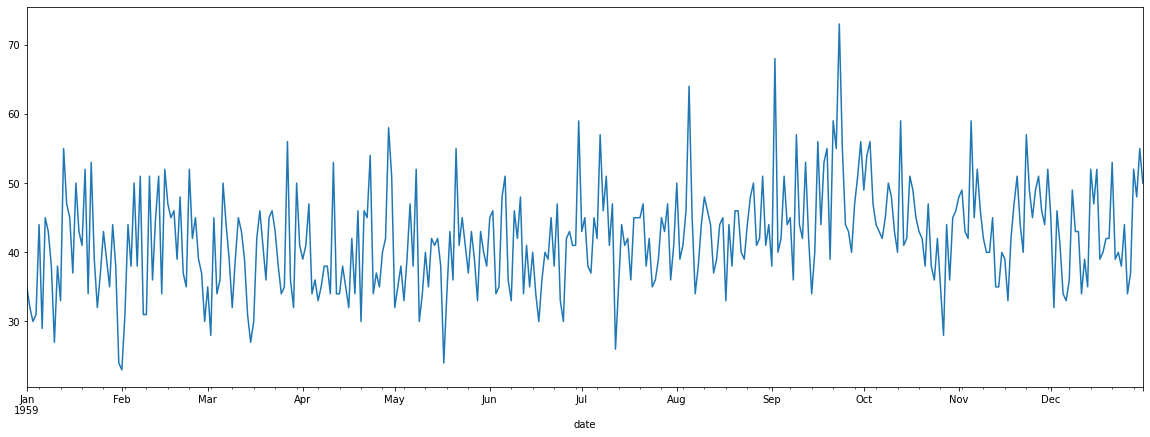

In [17]:
birth_data.plot(figsize=(20,7))
plt.show()

If see the graph there we will found the some sort of seasnality but too much so it majority belongs the stationary data.

---



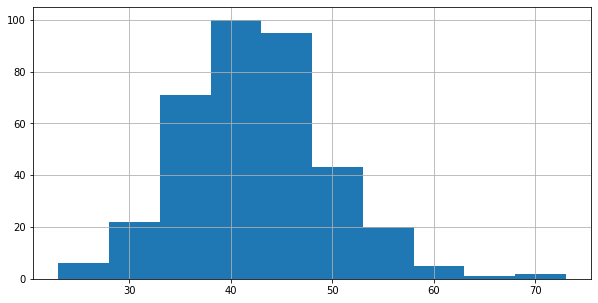

In [23]:
plt.figure(figsize=(10,5))
birth_data.hist()
plt.show()

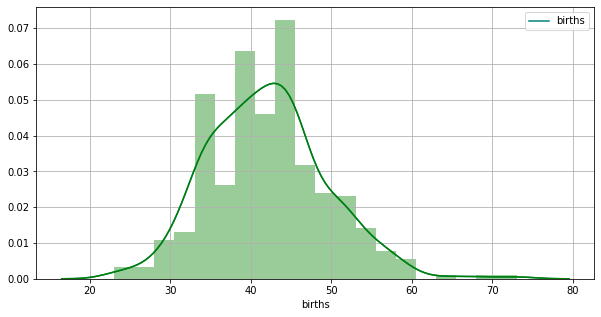

In [30]:
plt.figure(figsize=(10,5))
ax=sns.kdeplot(birth_data,color='teal')
sns.distplot(birth_data,ax=ax,color='g')
plt.grid()
plt.show()

In [32]:
print('Skeness of the data :-',birth_data.skew())  #It is right skewed data.
print('Kultoisis of the data :-',birth_data.kurt()) #This is the Lepto_kurltosis .It is greater than the statard normal postion of the curve.

Skeness of the data :- 0.447388586582243
Kultoisis of the data :- 0.7775256658193377


In [33]:
len(birth_data)

365

In [34]:
birth_data_1 = birth_data[:200]
birth_data_2 = birth_data[200:]

In [35]:
birth_data_1.mean()

40.0

In [36]:
birth_data_2.mean()

44.38181818181818

Mean should be same for the Stationary series but here is not happening.We will check further for the variance.

In [37]:
birth_data_1.var()

49.437185929648244

In [38]:
birth_data_2.var()

49.274057649667384

In this case the variance is constant throghtout the series.

# Dickey Fuller Test

In [40]:
from statsmodels.tsa.stattools import adfuller

In [43]:
test_result = adfuller(birth_data)

The rule of thumb here lesser the value,greater the model.

In [44]:
adfuller_score = test_result[0]
adfuller_score

-4.808291253559765

In [45]:
p_value = test_result[1]
p_value
#It is showing that after the four zeros the value will start from 52434
#But the whenever the p_value is greater than equal to the 0.05 that indicate.The series is not stationary.
#voice versa.
#This indicate that the series is stationary.

5.2434129901498554e-05

In [104]:
def enter_datasets_name(dataset):
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings

  print()
  print()
  print('Checking the trend of the data')


  warnings.filterwarnings('ignore')
  birth_data = pd.read_csv(dataset,index_col=[0],parse_dates=True,squeeze=True)
  birth_data.dropna()
  birth_data.plot(figsize=(20,7))
  plt.show()
  plt.figure(figsize=(10,5))
  ax=sns.kdeplot(birth_data,color='teal')
  sns.distplot(birth_data,ax=ax,color='g')
  plt.grid()
  plt.show()

  print("Seems like statinary,let's have look into this matter")

  print()
  print()
  print()


  print('Skeness of the data :-',birth_data.skew()) 
  print('Kultoisis of the data :-',birth_data.kurt())

  if len(birth_data)>40:
    birth_data_1 = birth_data[:200]
    birth_data_2 = birth_data[200:]
    print('mean of the birth_data1 series :-',birth_data_1.mean())
    print('Mean of the birth_data2 series :-',birth_data_2.mean())
    print('Variance of the birth_data1 series :-',birth_data_1.var())
    print('Variance of the birth_data2 series :-',birth_data_2.var())
    print("Here I am getting the variance is constant accross the series but not with case of mean,let's check further with the help of dfuller test")
    
    print()
    print()
    print('Dfuller Test')
    
    
    if adfuller_score >= 0.05:
      print('This is the NOt Stationary Series')
      print('Because p_value is  greater than 0.05,accepted NULL hypothesis.')
    else:
      print('This is the Stationary Series')
      print('Because p_value is lesser than 0.05,accepted Alternate hypothesis.')

  
  else:
    birth_data_11 = birth_data[:25]
    birth_data_22 = birth_data[25:]
    print('mean of the birth_data1 series :-',birth_data_11.mean())
    print('Mean of the birth_data2 series :-',birth_data_22.mean())
    print('Variance of the birth_data1 series :-',birth_data_11.var())
    print('Variance of the birth_data2 series :-',birth_data_22.var())
    
    print("Here I am getting the mean is constant accross the series but not with case of variance,let's check further with the help of dfuller test")
    print()
    print()
    print('Dfuller Test')
    
    
    
    if adfuller_score >= 0.05:
      print('This is the NOt Stationary Series')
      print('Because p_value is  greater than 0.05,accepted NULL hypothesis.')
    else:
      print('This is the Stationary Series')
      print('Because p_value is lesser than 0.05,accepted Alternate hypothesis.')



Checking the trend of the data


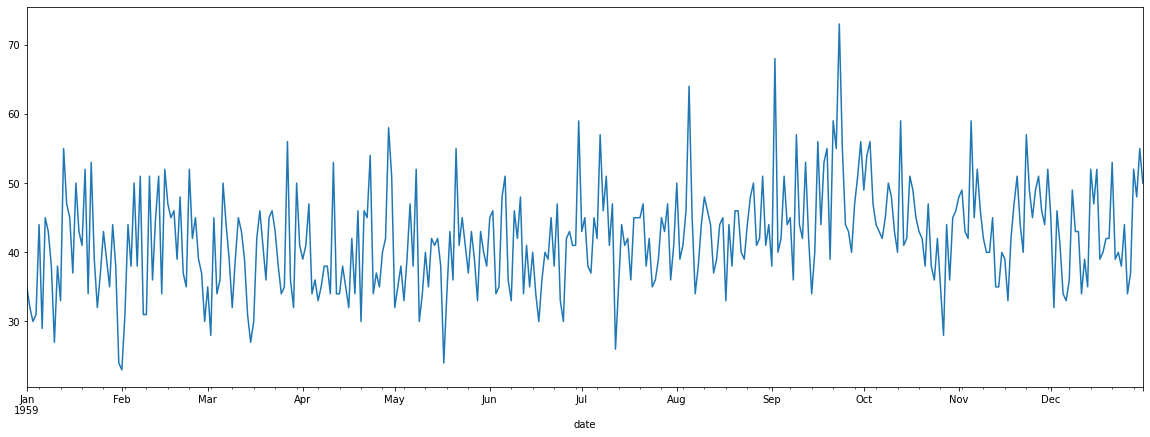

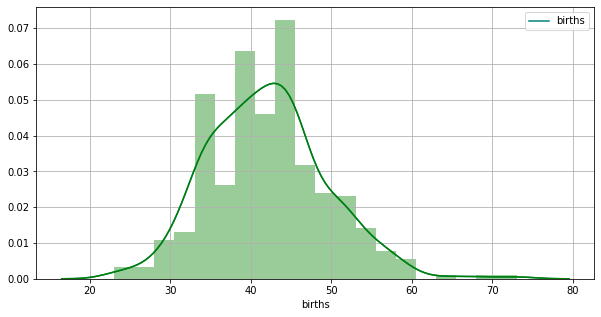

Seems like statinary,let's have look into this matter



Skeness of the data :- 0.447388586582243
Kultoisis of the data :- 0.7775256658193377
mean of the birth_data1 series :- 40.0
Mean of the birth_data2 series :- 44.38181818181818
Variance of the birth_data1 series :- 49.437185929648244
Variance of the birth_data2 series :- 49.274057649667384
Here I am getting the variance is constant accross the series but not with case of mean,let's check further with the help of dfuller test


Dfuller Test
This is the Stationary Series
Because p_value is lesser than 0.05,accepted Alternate hypothesis.


In [105]:
enter_datasets_name('/content/daily-total-female-births-CA.csv')

# Lets check the Another datasets.



Checking the trend of the data


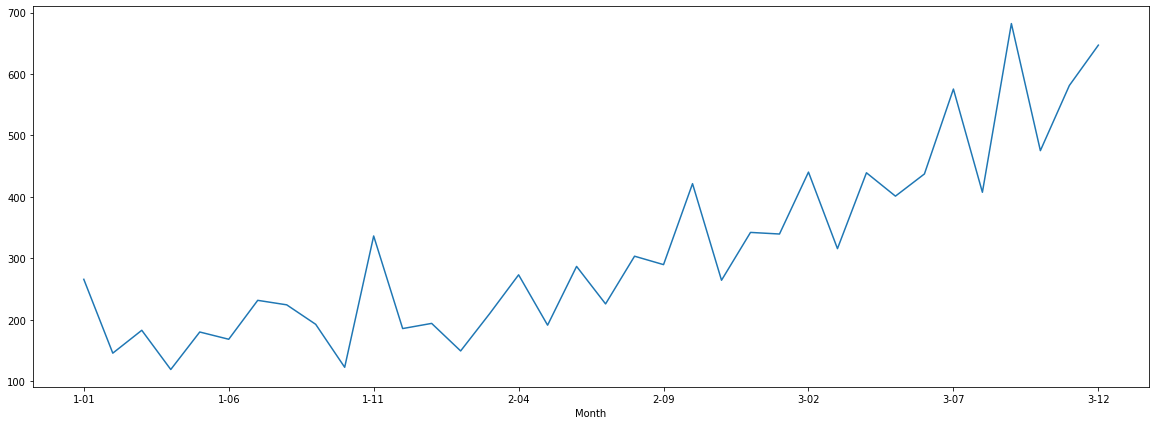

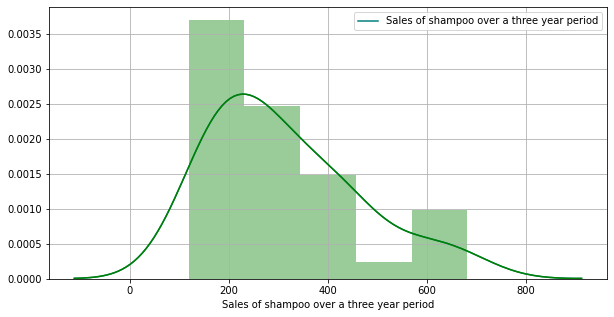

Seems like statinary,let's have look into this matter



Skeness of the data :- 0.8945388528534595
Kultoisis of the data :- 0.11622821118738624
mean of the birth_data1 series :- 234.02800000000002
Mean of the birth_data2 series :- 491.17272727272723
Variance of the birth_data1 series :- 5882.341266666667
Variance of the birth_data2 series :- 13009.41818181818
Here I am getting the mean is constant accross the series but not with case of variance,let's check further with the help of dfuller test


Dfuller Test
This is the Stationary Series
Because p_value is lesser than 0.05,accepted Alternate hypothesis.


In [106]:
enter_datasets_name('/content/sales-of-shampoo-over-a-three-ye.csv')

# Only For the specific Datasets.

In [96]:
def datasets_name(dataset):
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings
  warnings.filterwarnings('ignore')
  print()
  print()
  print('Checking the trend of the data')

  birth_data = pd.read_csv(dataset,index_col=[0],parse_dates=True,squeeze=True)
  birth_data.dropna()
  birth_data.plot(figsize=(20,7))
  plt.show()
  plt.figure(figsize=(10,5))
  ax=sns.kdeplot(birth_data,color='teal')
  sns.distplot(birth_data,ax=ax,color='g')
  plt.grid()
  plt.show()

  print("Seems like statinary,let's have look into this matter")

  print()
  print()
  print()


  print('Skeness of the data :-',birth_data.skew()) 
  print('Kultoisis of the data :-',birth_data.kurt())



  birth_data_1 = birth_data[:200]
  birth_data_2 = birth_data[200:]
  print('mean of the birth_data1 series :-',birth_data_1.mean())
  print('Mean of the birth_data2 series :-',birth_data_2.mean())
  print('Variance of the birth_data1 series :-',birth_data_1.var())
  print('Variance of the birth_data2 series :-',birth_data_2.var())
  print("Here I am getting the variance is constant accross the series but not with case of mean,let's check further with the help of dfuller test")
    
  print()
  print()
  print('Dfuller Test')
    
    
  if adfuller_score >= 0.05:
    print('This is the NOt Stationary Series')
    print('Because p_value is  greater than 0.05,accepted NULL hypothesis.')
  else:
    print('This is the Stationary Series')
    print('Because p_value is lesser than 0.05,accepted Alternate hypothesis.')



Checking the trend of the data


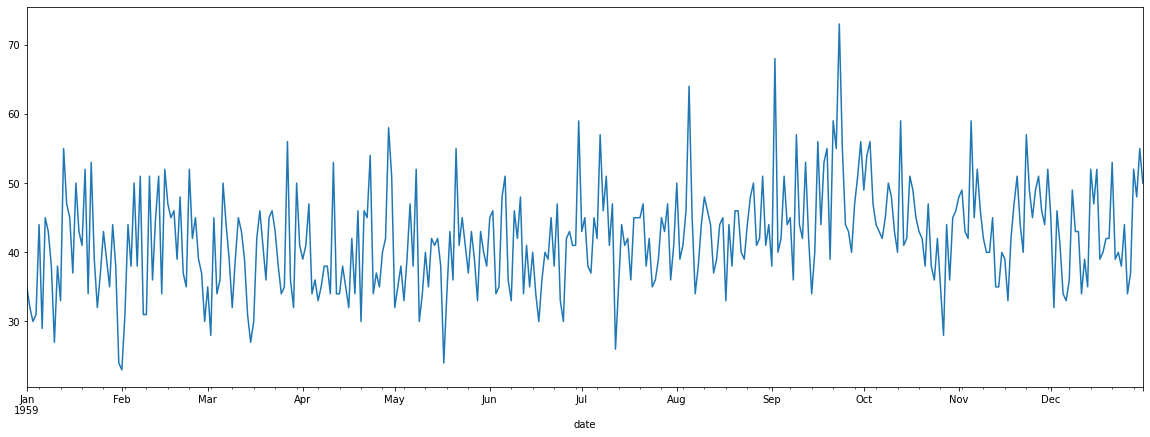

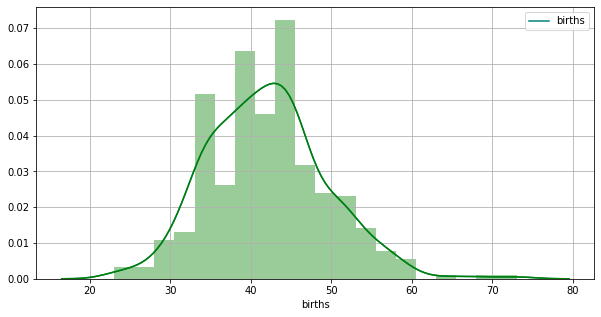

Seems like statinary,let's have look into this matter



Skeness of the data :- 0.447388586582243
Kultoisis of the data :- 0.7775256658193377
mean of the birth_data1 series :- 40.0
Mean of the birth_data2 series :- 44.38181818181818
Variance of the birth_data1 series :- 49.437185929648244
Variance of the birth_data2 series :- 49.274057649667384
Here I am getting the variance is constant accross the series but not with case of mean,let's check further with the help of dfuller test


Dfuller Test
This is the Stationary Series
Because p_value is lesser than 0.05,accepted Alternate hypothesis.


In [97]:
datasets_name('/content/daily-total-female-births-CA.csv')

# Thank You !!